In [1]:
%matplotlib inline
import os
path = '/root/github/3_SpecialModule'
os.sys.path.append(path)

from Me import *

Sucessful Import Me!!!


# Train Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Params

In [4]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10
total_batch = int(mnist.train.num_examples/batch_size)

# Construct Model

In [13]:
# Input
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)
tf_x = tf.placeholder("float", [None, n_input])

# neural network layers
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(tf_x)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = tf_x

# Loss + Optimizer

In [15]:
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate)
train_step = optimizer.minimize(loss)

# Initializing the variables

In [16]:
sess = tf.Session()                                                                 # control training and others
init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init)     # initialize var in graph

# Launch the graph

In [23]:
for step in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([train_step, loss], feed_dict={tf_x: batch_xs})
    # Display logs per epoch step
    if step % display_step == 0:
        print("===> Epoch: {:04d}, loss = {:0.9f}".format(step + 1, l))
print("Optimization Finished!")

===> Epoch: 0001, loss = 0.091047890
===> Epoch: 0002, loss = 0.088606797
===> Epoch: 0003, loss = 0.089437075
===> Epoch: 0004, loss = 0.087532014
===> Epoch: 0005, loss = 0.087420501
===> Epoch: 0006, loss = 0.087470561
===> Epoch: 0007, loss = 0.083619587
===> Epoch: 0008, loss = 0.083462439
===> Epoch: 0009, loss = 0.085919850
===> Epoch: 0010, loss = 0.086481720
===> Epoch: 0011, loss = 0.082908496
===> Epoch: 0012, loss = 0.082550660
===> Epoch: 0013, loss = 0.083164625
===> Epoch: 0014, loss = 0.083360761
===> Epoch: 0015, loss = 0.083107986
===> Epoch: 0016, loss = 0.082714178
===> Epoch: 0017, loss = 0.080772877
===> Epoch: 0018, loss = 0.080077626
===> Epoch: 0019, loss = 0.080152184
===> Epoch: 0020, loss = 0.080045730
Optimization Finished!


/root/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


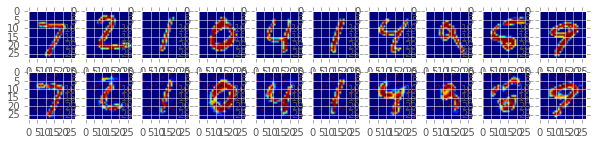

In [24]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={tf_x: mnist.test.images[:examples_to_show]})
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
f.show()
plt.draw()